In [7]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'

# %%
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import time

time.perf_counter()
start = time.time()

# set parameters
n_samples = 10000
n_step = 10000

# genarte data
# initial condition
# 在（0，0）生成黑洞
# 在以（0，0）为圆心，r=10000的圆盘内生成均匀分布的粒子
# 粒子的初速度为\mu=5的正态分布
r = np.random.uniform(0, 100, n_samples)
theta = np.random.uniform(0, 2*np.pi, n_samples)
x = r*np.cos(theta)
y = r * np.sin(theta)
vx = np.random.normal(size=n_samples)*5
vy = np.random.normal(size=n_samples)*5

# random walk
x_rand = []
y_rand = []
print("Genarating data>>>")
for i in tqdm(range(n_step)):
    r = np.random.random(n_samples)
    theta = np.random.uniform(0, 2*np.pi, n_samples)
    x_rand.append(r*np.cos(theta))
    y_rand.append(r*np.sin(theta))

# caculate
print("Caculating>>>")
n = 0
for step in tqdm(range(n_step)):
    r2 = x ** 2 + y ** 2
    F = 10000 / r2**1.5
    ax = -F * x
    ay = -F * y
    vx += ax
    vy += ay
    x += x_rand[step] + vx
    y += y_rand[step] + vy

# save each single picture every 50 step and later generate them into GIF
'''
    if (step % 50 == 0):
        plt.figure(figsize=(10,10))
        plt.plot([0],[0], 'ro', markersize=5)
        plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
        plt.xlim(-n_samples , n_samples )
        plt.ylim(-n_samples , n_samples )
        plt.savefig('./fig/%d.png' % n)
        plt.cla()
        plt.close()
        n = n+1
'''

end = time.time()
elapse = end - start
print('total time: ' + str(elapse))
# saveGif.main(n)


# %%
# Save gif
'''
import imageio


def create_gif(image_list, gif_name):

    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
    # Save them as frames into a gif
    imageio.mimsave(gif_name, frames, 'GIF', duration=0.005)
    print("Complete !")
    return


def main(n):
    image_list = []
    for i in range(n):
        image_list.append('./fig/'+str(i) + '.png')
    gif_name = 'created_gif'
    create_gif(image_list, gif_name)


if __name__ == "__main__":
    main(n)

'''

# %%
# plot contour

 72%|███████▏  | 7183/10000 [00:25<00:15, 183.07it/s]

KeyboardInterrupt: 

array([-5.00067984e+08, -5.00025942e+08, -5.00075919e+08, ...,
       -4.99999917e+08, -5.00010016e+08, -4.99992120e+08])

ploting scatter and hist...


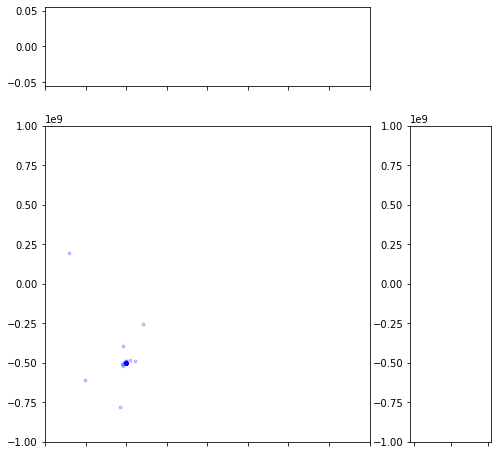

In [6]:
# %%
# plot the scatter and the hist
print("ploting scatter and hist...")
plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, wspace=0.5, hspace=0.5)

main_ax = plt.subplot(grid[1:4, 0:3])
plt.plot(x, y, 'bo', markersize=3, alpha=0.2)
plt.xlim(-n_samples, n_samples)
plt.ylim(-n_samples, n_samples)

y_hist = plt.subplot(grid[1:4, 3], xticklabels=[], sharey=main_ax)
plt.hist(y, 20, range=(-n_samples, n_samples),
         orientation='horizontal', color='blue')

x_hist = plt.subplot(grid[0, 0:3], xticklabels=[], sharex=main_ax)
plt.hist(x, 20, range=(-n_samples, n_samples),
         orientation='vertical', color='blue')

plt.show()

In [ ]:
print("ploting contour...")
v = (vx**2+vy**2)/2
data = np.concatenate(
    [x.reshape(-1, 1), y.reshape(-1, 1), v.reshape(-1, 1)], axis=1)

mask = (data[:, 0]**2+data[:, 1]**2 < 1000000)
DATA = data[mask]
X = DATA[:, 0]
Y = DATA[:, 1]
Z = DATA[:, 2]

fig, ax = plt.subplots(1, figsize=(10, 8))

ax.tricontour(X, Y, Z, levels=14, linewidths=0.5, colors='k')
cntr = ax.tricontourf(X, Y, Z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr, ax=ax)
ax.plot(X, Y, 'ko', ms=3)
ax.set(xlim=(-500, 500), ylim=(-500, 500))
ax.set_title('tricontour (%d points)' % len(DATA))

plt.show()
